In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Daten Analysieren

Daten sind die Grundlage von Machine Learning (ML) Algorithmen.
Debei zählt nicht nur die Masse an Daten, sondern auch, oder vor allem deren Qualität.
Die Ergebnisse der ML-Algorithmen können nur so gut sein, wie die Qualität der Daten es zulässt.

Daher ist das Verständnis von Daten ein wesentlicher Schritt für jedes ML Projekt.
Lassen Sie uns zunächst einige grundlegende Begriffe von Daten durchgehen:

Liegen die Daten in *strukturierter* Form vor so kann man sie in der Regel als Tabelle oder Matrix beschrieben.
Die einzelnen Zeilen dieser Tabellen nennt man **Instanzen** oder **Datenpunkte**, bei den Spalten spricht man von **Attributen**, **Merkmalen** oder **Variablen**.

- Ein **Datenpunkt** ist ein Datenpaket, das ein Objekt beschreibt (einen Fall, eine Person, ein Zeitpunkt, ...).
- Ein **Attribut** ist eine messbare Eigenschaft, anhand derer Objekte beschrieben werden (Größe, Alter, Gewicht, Augenfarbe, ...).

Attribute können **kategorisch** oder **numerisch** sein:
- **Kategorisch** sind Attribute, deren Wertebereich eine endliche Menge ist (Farbe, Typ, Wochentag, ...)
  - **Ordinal** sind katagorische Attribute mit Ordnung (sehr schlecht, schlecht, zufriedenstellend, gut, sehr gut)
  - **Nominal** sind katagorische Attribute ohne Reihenfolge (grün, blau, gelb)
- **Numerisch** sind Attribute, die durch Zahlen dargestellt werden (Größe, Gewicht, Temperatur, ...) und innerhalb eines endlichen oder unendlichen Intervalls einen beliebigen Wert annehmen können.


Im Folgenden betrachten wir einen Datensatz für Spielerdaten aus dem FIFA 20-Videospiel:

In [61]:
data = pd.read_csv("players_20.csv", encoding = "ISO-8859-1")
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot
0,M. Reus,30,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,"CAM, LM, ST",Right
1,M. Hummels,30,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,CB,Right
2,R. BÃ¼rki,28,187,85,Switzerland,Borussia Dortmund,85,86,32000000,92000,GK,Right
3,A. Witsel,30,186,81,Belgium,Borussia Dortmund,85,85,31500000,110000,"CDM, CM",Right
4,J. Sancho,19,180,76,England,Borussia Dortmund,84,92,44500000,61000,"RM, LM",Right


In [62]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur
count,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000
mean,23.202381,182.523810,77.178571,70.976190,78.940476,1.078518e+07,36702.380952
std,4.556948,6.155566,7.147602,10.371388,6.715117,1.348020e+07,38604.818902
min,17.000000,169.000000,65.000000,52.000000,62.000000,1.000000e+05,1000.000000
25%,19.000000,178.000000,72.000000,60.750000,74.000000,4.250000e+05,1000.000000
50%,22.500000,183.000000,76.000000,73.000000,80.500000,4.300000e+06,26500.000000
75%,26.000000,186.250000,82.250000,81.000000,83.250000,1.775000e+07,65500.000000
max,35.000000,196.000000,97.000000,88.000000,92.000000,5.600000e+07,170000.000000


`age`, `height_cm` und `weight_kg` sind Beispiele für numerische Attribute, `nationality`, `club` und `preferred_foot` sind kategorische Attribute.

## Visualisierung
Um einen besseren Eindruck über die Attribute zu erhalten, ist es ratsam, die die Daten zu visualisieren.
Eine umfangreiche und weit verbreitete Python Bibliothek dafür ist `matplotlib`.

### 1. Säulendiagramme (Bar Charts)
Säulendiagramme sind eine einfache Möglichkeit, um die Häufigkeit bestimmter Werte in **kategorischen Merkmalen** darzustellen

Im folgenden Diagramm wird gezeigt, wie häufig bestimmte Clubs im Datensatz genannt werden:

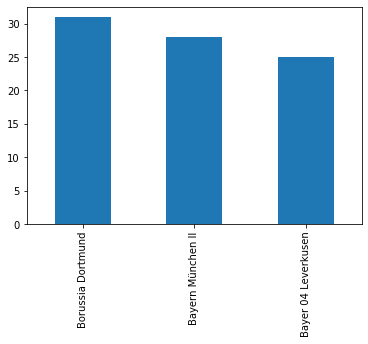

In [63]:
data['club'].value_counts().plot.bar()

Bei einer Variante der Säulendiagramme sind die "Säulen" horizontal aufgetragen. Man spricht in dem Fall von **Balkendiagrammen** (*column charts*). Diese haben den Vorteil, dass die zu vergleichenden Werte besser lesbar sind.

**Aufgabe** Verwenden Sie die Methode `barh` der `matplotlib` Bibliothek um ein weiteres kategorisches Merkmal darzustellen.

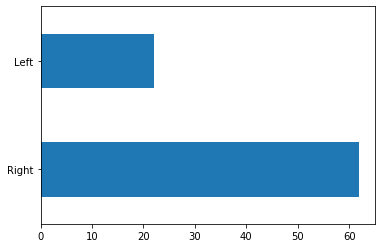

In [64]:
data['preferred_foot'].value_counts().plot.barh()

In [69]:
help(plt.barh)

Help on function barh in module matplotlib.pyplot:

barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
    Make a horizontal bar plot.
    
    The bars are positioned at *y* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The horizontal baseline
    is *left* (default 0).
    
    Each of *y*, *width*, *height*, and *left* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    y : scalar or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    width : scalar or array-like
        The width(s) of the bars.
    
    height : sequence of scalars, optional, default: 0.8
        The heights of the bars.
    
    left : sequence of scalars
        The x coordinates of the left sides of the bars (default: 0).
    
    align : {'center', 'edge'}, opt

### 2. Histogramm

Mit einem Histogramm Häufigkeitsverteilung von werten eines **numerischen Merkmals**  grafisch dargestellt werden.

Der Wertebereich des Attributs wird dazu in Intervalle (mit normalerweise gleicher Größe) eingeteilt.
Die Anzahl der Werte, die in einen Bereich hineinfallen, bestimmt dann die Größe der Säulen in einem Säulendiagramm.

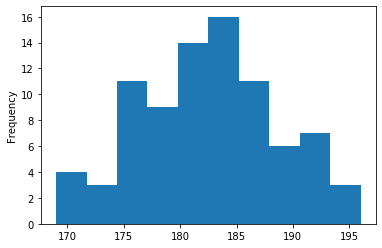

In [70]:
data['height_cm'].plot.hist()

Das obige Histogramm zeigt eine Werteverteilung, die in etw die Form einer Glockenkurve hat. Man kann also vermuten, das die Größe der Spieler eine normalverteilte Variable ist.

**Aufgabe** Plotten Sie die Attribute `potential` und `overall` in ein Histogramm.

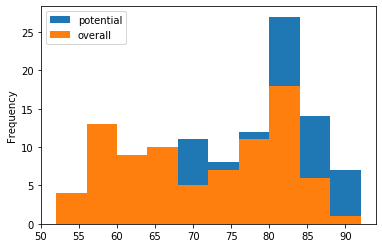

In [74]:
data[['potential','overall']].plot.hist()

### 3. Streudiagramm (scatter plot)

Ein Streudiagramm zeigt den Zusammenhang von Wertepaaren mehrerer Attribute.
Der einfachste Fall ist ein zweidimensionales Diagramm in dem die Abhängigkeiten zweier Attribute dargestellt sind.
Jeder Punkt entspricht einem Datenpunkt, wobei die *x* und *y* Koordinaten den Werten der beiden Attribute für diesen Datenpunkt entspricht.

Im folgenden Diagramm vergleichen wir die Größe und das Gewicht der Spieler.
Man sieht im Diagramm bereits eine Art *Muster*: Je größer ein Spieler ist, desto schwerer ist er **im Allgemeinen** auch.
Wichtig ist hier: Das ist kein *Gesetz* oder eine *Regel* die immer gilt. Es gibt auch Spieler, die größer und gleichzeitig leichter als andere Spieler sind. Solche Fälle sind aber eher die Ausnahme, bzw. es ist weniger wahrscheinlich.

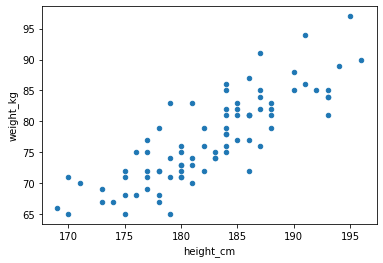

In [75]:
data.plot.scatter('height_cm', 'weight_kg')

Wenn mehr als 2 Attribute verglichen werden sollen, wird die Darstellung komplizierter.
Eine Möglichkeit ist, von zwei- in den dreidimensionalen Raum zu wechseln.
Eine andere Möglichkeit ist, das Aussehen der einzelnen Punkte (z.B. die Farbe) anhand weiterer Attribute zu variieren.


**Aufgabe:** Verwenden Sie den Parameter `c` der `matplotlib`-Funktion `scatter`, um neben `height_cm` und `weight_kg` ein weiteres Attribut (z.B. `overall`) darzustellen.


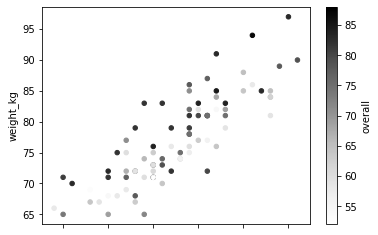

In [76]:
data.plot.scatter('height_cm', 'weight_kg', c='overall')

### 4. Box Plot

Boxplots sind eine Methode, mit der sich die charakteristischen Eigenschaften eines numerischen Attributs auf kompakte und dennoch übersichtliche Weise darstellen lassen.

Die Box entspricht dem Bereich, in dem die mittleren 50% aller Werte liegen, der Strich in der Box gibt die Position des Medians an.
Die *Whisker* (auch *Antennen* genannt) geben den Bereich an, in dem die allermeisten Werte liegen.
Punkte außerhalb dieses Bereichs sind als *Ausreißer* zu werten.

![Box plot](https://upload.wikimedia.org/wikipedia/commons/b/b1/Elements_of_a_boxplot.svg)

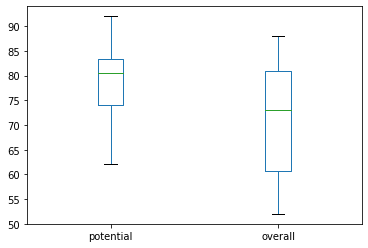

In [77]:
data[['potential','overall']].plot.box()

## Ausreißererkennung

Ein *Ausreißer* ist ein Wert, der weit entfernt von allen (oder den allermeisten) anderen Werten des gleich Datensatzes liegt.

Eine Möglichkeit, solche Ausreißer zu erkennen, ist die Daten zu visualisieren, z.B. mithilfe eines Boxplots.
Im folgenden Beispiel schauen wir uns das Merkmal `value_eur`, also den Marktwert der Spieler an.
Wie die Angabe an der Die y-Achse zeigt, sind die Werte in $1e7$, also Millionen dargestellt.

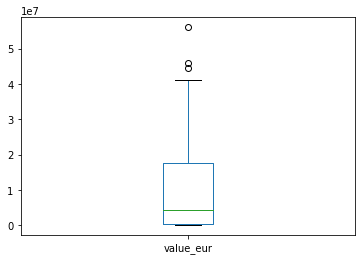

In [78]:
data['value_eur'].plot.box()

Datenpunkte, die Außreißer in mehreren Kategorien darstellen, identifiziert man auch über Streudiagramme.
Wie wir in folgendem Beispiel sehen, besitzt ein Spieler ein sehr hohen Wert in den Kategorien *Spielerwert* (`value_eur`) und *Gehalt* (`wage_eur`).

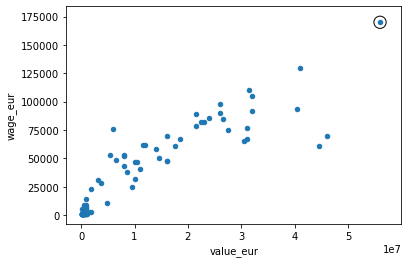

In [79]:
data.plot.scatter('value_eur', 'wage_eur')
plt.scatter(data['value_eur'][0],data['wage_eur'][0], s=150, edgecolors='k', c='None')

Ausreißer können aber auch berechnet werden.
Im folgenden Beispiel berechnen wir für alle Datenpunkte und Merkmale, welche Werte mehr als drei Standardabweichungen größer als der Mittelwert sind.

In [80]:
s = 3*data.std() + data.mean()
(data.gt(s, axis=1)).head()

,age,club,height_cm,nationality,overall,player_positions,potential,preferred_foot,short_name,value_eur,wage_eur,weight_kg
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


Wenn wie die Ausreißer erkannt haben, können wir sie aus dem Datensatz entfernen.

In [81]:
data_clean = data[(data.gt(s, axis=1)).any(axis=1)==False].copy()

In [82]:
print(f"Der ursprüngliche Datensatz hat {data.shape[0]} Zeilen")
print(f"Der bereinigte Datensatz hat noch {data_clean.shape[0]} Zeilen")

Der ursprüngliche Datensatz hat 84 Zeilen
Der bereinigte Datensatz hat noch 83 Zeilen


# Datenvorverarbeitung

Bevor Machine Learning Verfahren eingesetzt werden können, müssen die Datensätze in der Regel sorgfältig vorberarbeitet werden.
Je nach verwendetem Verfahren kann es nötig sein, bestimmte Vorverarbeitungsschritte durchzuführen.
Die im Folgenden beschrieben Schritte sind für fast alle Anwendungen notwendig:

## Data selection
Datensätze sind häufig groß, in dem Sinne, dass viele Daten für verschiedene Merkmale gesammelt wurden.
Viele Daten zu haben ist prinzipiell auch vorteilhaft, allerdings sollten für Analysen möglichst nur die *relevanten* Daten herangezogen werden.

In manchen Fällen können Sie die weniger relvanten Merkale direkt identifizieren.
In unserem Datensatz nehmen wir einmal an, dass der Spielername und die Positionen eher unwichtig sind. Daher nehmen dir die kompletten Merkmale, also die Spalten in unserem Datensatz, heraus:

In [37]:
data_clean.drop(['short_name','player_positions'], axis=1, inplace=True)

Welche Merkmale relevant sind und welche nicht ist allerdings nicht immer einfach zu beantworten.
Daher ist es ratsam, mathematische Verfahren zu verwenden, mit denen weniger relevante oder sogar überflüssige Merkmale identifiziert werden können.
Mahr dazu aber später...

## Normalisierung
Die Wertebereiche der verschiedenen Merkmale können untereinander sehr unterschiedlich sein.
Das Alter der Spieler wird kaum über $50$ gehen, die Gehälter hingegen fangen erst deutlich über $1000$ an.
Wenn unser Machine Learning Modell darauf angewiesen ist, dass alle Merkmale den selben *Hebel* für das Modell haben, ist es sinnvoll, wenn die Werte aller Merkmale *normalisiert* werden.


### 1. Standardisierung
Ein der am häufigsten angewendeten Methoden zur Normalisieurung ist die *Standardisierung*.
Hierbei wird von den Werten der Datenpunkte des Attributs $X$ zunächst der Mittelwert $\bar X$ abgezogen, sodass die transformierten Daten immer den Mittelwert Null besitzen. Anschließend teilt man den Wert durch die Varianz $\sigma^2_X$, sodass das transformierte Merkmal $\hat X$ die Varianz 1 besitzt:
$$\hat x\mapsto \frac{x - \bar X}{\sigma^2_X}$$

Man kann die Standardisierung nach der oben angeeben Formel in Python *per Hand* ausführen, oder bestehende Funktionen verwenden, z.B. die Funktion `scale`aus dem `preprocessing`-Modul der umfangreichen Python-Bibliothek `scikit-klearn` (kurz: `sklearn`).

In [38]:
# Selektiere die Spalten mit numerischen Datentypen (int64) in unserem Fall
ncul = data_clean.select_dtypes('int64').columns

# Wende die Formel zur Standardisierung an
data_strd = (data_clean[ncul] - data_clean.mean())/data_clean.std()

In [39]:
# Standardisierung mit sklearn
data_skstrd = scale(data_clean[ncul])

Wenn wir die die Streuungswerte der neuen Datensätze vergleichen sehen wir, dass die Mittelwerte sehr nahe bei 0 und die Standardabweichung nahe bei 1 liegt.
Außerdem sind die selbst berechneten Daten sehr nahe an den mit `sklearn` berechneten Daten.
Unterschiede kommen aufgrund der unterschiedlichen numerischen Berechnungen zustande. 

In [40]:
data_strd.describe().loc[['mean', 'std']]

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur
mean,-3.638321e-16,6.099539e-16,-1.016590e-16,4.093111e-16,9.015546e-16,2.006427e-17,-7.758185e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [41]:
pd.DataFrame(data_skstrd, columns=data_strd.columns).describe().loc[['mean', 'std']]

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur
mean,-3.959350e-16,5.945712e-16,-2.046556e-16,2.434465e-16,7.249890e-16,1.230609e-16,3.504559e-16
std,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00


### 2. Min-Max Normalisierung
Eine, weitere Methode zur Normalisierung der Datenreihen ist die *Min-Max-Skalierung*.
Die Idee dahinter ist überaus einfach: Zunächst wird von allen Datenpunkten $x$ des Attributs $X$ das Minimum der Attributwerte $\min_X$ abgezogen. Nach diesem Schritt beginnen alle Wertebereiche der Attribute bei 0.
Anschließend werden alle Werte durch die Größe des Wertebereichs $\max_X-\min_X$  geteilt. Danach sind alle Werte auf den Wertebereich $[0,1]$ skaliert:
$$\hat x\mapsto \frac{x-\min_X}{\max_X-\min_X}$$

In `sklearn` heißt die Klasse zur Min-Max Normalisierung `MinMaxScaler`

In [54]:
# Min-Max-Skalierung per Hand
data_scaled = (data_clean[ncul] - data_clean[ncul].min())/(data_clean[ncul].max()-data_clean[ncul].min())

In [55]:
#  Min-Max-Skalierung mit sklearn
data_skscaled = MinMaxScaler().fit_transform(data_clean[ncul])

Wir können nun wieder beide Varianten vergleichen:

In [58]:
data_skscaled.max() - data_scaled.min()

age          1.0
height_cm    1.0
weight_kg    1.0
overall      1.0
potential    1.0
value_eur    1.0
wage_eur     1.0
dtype: float64

In [59]:
pd.DataFrame(data_scaled, columns=data_scaled.columns).max() - pd.DataFrame(data_scaled, columns=data_scaled.columns).min()

age          1.0
height_cm    1.0
weight_kg    1.0
overall      1.0
potential    1.0
value_eur    1.0
wage_eur     1.0
dtype: float64

**Aufgabe:** Normieren Sie nach den Prinzipien der Min-Max-Skalierung die Werte unseres Datensatzes auf den den Bereich $[-1,1]$ (statt wie oben auf den Wertebereich $[0,1]$)

In [60]:
data_ex = None
### BEGIN SOLUTION
data_ex = 2*(data_clean[ncul] - data_clean[ncul].min())/(data_clean[ncul].max()-data_clean[ncul].min())-1
# oder noch einfacher
# data_ex = data_scaled*2-1
### END SOLUTION
data_ex

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur
1,0.444444,0.629630,0.8125,1.000000,0.666667,0.782135,1.000000
2,0.222222,0.333333,0.2500,0.885714,0.600000,0.389978,0.410853
3,0.444444,0.259259,0.0000,0.885714,0.533333,0.368192,0.689922
4,-0.777778,-0.185185,-0.3125,0.828571,1.000000,0.934641,-0.069767
5,-0.666667,0.407407,0.1250,0.828571,1.000000,1.000000,0.069767
...,...,...,...,...,...,...,...
79,-0.777778,0.037037,-0.4375,-0.771429,-0.666667,-0.998257,-1.000000
80,-0.777778,-0.555556,-0.8125,-0.885714,-0.533333,-0.998257,-1.000000
81,-0.888889,0.333333,0.0625,-0.885714,-0.600000,-0.999129,-1.000000
82,-0.777778,-0.703704,-0.7500,-0.942857,-0.466667,-0.998693,-1.000000


In [25]:
# Test Cell
#----------
assert (data_ex.max() == 1).all()
assert (data_ex.min() == -1).all()

In `sklearn` kann man dies durch Überschreiben des Attributs `feature_range` des `MinMaxScaler`-Objekts erreichen:

In [26]:
data_skex = MinMaxScaler(feature_range=(-1,1)).fit_transform(data_clean[ncul])
data_skex.min(axis=0), data_skex.max(axis=0)

(array([-1., -1., -1., -1., -1., -1., -1.]),
 array([1., 1., 1., 1., 1., 1., 1.]))

Nun können wir den ursprünglichen und den normierten Datensatz zusammenfügen:

In [27]:
# updating our dataframe
data_clean[ncul] = data_scaled
data_clean.head()

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot
1,0.722222,0.814815,0.90625,Germany,Borussia Dortmund,1.000000,0.833333,0.891068,1.000000,Right
2,0.611111,0.666667,0.62500,Switzerland,Borussia Dortmund,0.942857,0.800000,0.694989,0.705426,Right
3,0.722222,0.629630,0.50000,Belgium,Borussia Dortmund,0.942857,0.766667,0.684096,0.844961,Right
4,0.111111,0.407407,0.34375,England,Borussia Dortmund,0.914286,1.000000,0.967320,0.465116,Right
5,0.166667,0.703704,0.56250,Germany,Bayer 04 Leverkusen,0.914286,1.000000,1.000000,0.534884,Left


## Encoding
Bisher haben wir ausschließlich die numerischen Merkmale betrachtet, aber noch nicht die kategorischen,
Die allermeisten ML Verfahren basieren darauf, dass mit den Werten der Attribute *gerechnet* wird.
Daher ist es in aller Regel notwendig, kategorische Merkmale in numerische zu überführen, also zu *encodieren*.

### 1. Ganzzahlcodierung
Eine Möglichkeit katagorischen Daten in numerische zu überführen besteht darin, jeder *Kategorie* einen eindeutigen (Integer-) Zahlenwert zuzuordnen.
Diese einfache Methode ist sogar sehr sinnvoll, **aber nur, wenn die kategorialen Variablen ordinal sind**.
Ein gutes Beispiel sind die Schulnoten *sehr gut*, *gut*, *befriedigend*, usw., denen man passenderweise die Werte $1$, $2$, $3$, usw. zuordnen, und dann mit diesen Werten auch sinnvoll rechnen kann.
Sind **nominal**, also ohne erkennbare Ordnung kann die Ganzzahlcodierung zu schlechteren oder gänzlich **unerwarteten Ergebnissen** führen.
Das liegt vereinfacht gesagt daran, dass die Verfahren aus der numerischen Werten ahängigkeiten herleiten, die in wirklichkeit nicht exisieren.
 

In `sklearn` kann man eine Ganzzahlcodierung durch die Klasse `OrdinalEncoder` realisieren.

In [ ]:
# Spalten mit kategorischen Attributen
ccul = ['club','nationality','preferred_foot']

data_en = data_clean.copy()
data_en[ccul] = OrdinalEncoder().fit_transform(data_clean[ccul])
data_en.head()

Es ist ebenfalls möglich, direkt mit `pandas` kategorische Merkmale zu enkodieren.
Dazu setzt man den Spaltentyp auf auf `category` und wählt als *Encoding* `cat.codes`


In [ ]:
data_clean['club'].astype('category').cat.codes

### 2. One-hot Codierung

Wir haben ja bereits angesprochen, dass sich für die nominale Merkmale die Ganzzahlkodierung nicht eignet.
Eine sehr verbreitete Transformation, die auch für nominale Attribute verwendet werden kann ist die *one-hot Codierung*.
Hierbei wird ein Merkmal mit $n$ unterschiedlichen Kategorien in ein einen $n$-dimensionalen Vektor überführt.
Jede Position dieses Vektors steht für eine bestimmte Kategorie.
Ist für einen Datenpunkt in diesem Vektor an der Stelle $i$ eine $1$ eingetragen, so besitzt der Datenpunkt für dieses Merkmal die $i$-te Kategorie.

Wie man leicht sieht, kann in diesem Vektor nur eine $1$ eingetragen sein, denn der Datenpunkt kann Maximal einer Kategorie zugeordnet sein. Alle anderen Positionen des Vektors sind $0$. Nur eine Eins, daher der Namen *one-hot*.

In `sklearn` verwendet man die One-hot Codierung über die `OneHotEncoder` Klasse.

In [ ]:
onehot = OneHotEncoder(sparse=False).fit_transform(data_clean[ccul])
onehot[:5]

Auch hier können wir das gleiche mit `pandas` erreichen, und zwar mit der Funktion `pandas.get_dummies`.
Jedes kategorische Merkmal wird darüber zu $n$ einzelnen Merkmalen expandiert, wobei $n$ die Anzahl der Werte ($=$ Kategorien) des Merkmals ist.

In [ ]:
data_oh = pd.get_dummies(data_clean)
data_oh.head()

## Aufteilung der Trainings- und Testdaten

Eine typische Vorgehensweise, um ein Machine Learning Modell zu bewerten, ist es, das Modell mit neuen, *neuen* Daten zu testen.
*Neu* bedeutet hier, dass die Daten für das Trainieren des Modells nicht verwendet wurden.
Kennt man die "Ergebnisse" (*Label*) der Testdaten, so kann man sehr genau abschätzen, wie gut das trainierte Modell funktioniert.

Aber warum benötigt man hier neue Daten? Wäre es nicht gut, wenn man diese Daten auch für das training benutzen würde, um das Modell noch besser zu entwickeln?
Ganz im Gegenteil: Im Einsatz wird Ihr Modell immer mit unbekannten Daten arbeiten müssen. Es kommt also vor allem darauf an, wie gut das Modell *generalisiert*.
Verwenden Sie alle Ihre Daten für das Training, so wird das Modell vielleicht sehr gute Ergebnisse liefern; aber eben nur für **diese Daten**. Es ist also *übertrainiert* (engl. *overfit*).

Um *Overfitting* zu verhindern, sollten Sie also immer einen Teil des Datensatzes für das Testen reservieren.
Dieser Teil ist üblicherweise kleiner als der Trainigsdatensatz, wie groß hängt von dem Umfang des Datensatzes ab.

Für große Datensätze (z.B. mit mehr als 1 Mio. Datenpunkten) ist es angebracht, ein kleineres Testset (2%) zu verwenden.
Bei kleineren Datensätzen ist Testdatensatz von $1/3$ bis $1/5$ der Gesamtdaten üblich.

`sklearn` beinhaltet die Funktion `train_test_split` zum automatischen Aufteilen von Daten.

In [ ]:
train_set, test_set = train_test_split(data_oh, test_size=0.3)
train_set.shape, test_set.shape

# Optimierungen

Um die Qualität der Trainingsdaten weiter zu verbessern, können weitere Techniken zum Einsatz kommen.
Einige von diesen Techniken sollen im FOlgenden kurz vorgestellt werden.

## Deminsionalitätsreduzierung

Bei Erfassen von Daten ist man mmeistens nicht "wählerisch". Es wird gesammelt, was erfasst werden kann und nicht so sehr darauf geachtet, welche Daten man später eventuell *benötigt*.
Dieser Ansatz ist prinzipiell gut, lässt er doch den größten Spielraum für spätere Analysen.

Wenn man nun aber ein gewisse Fragestellung mit einem Datensatz bearbeiten möchte, sind in der Regel nicht alle Attribute des Datensatzes relevant.
Sie beim Training beizubehalten bedeutet aber meistens, einen höheren Zeit- und Ressourcenaufwand beim Training der sich nicht selten in einem schlechter trainierten Modell wiederspiegelt.
Es ist also empfehlenswert, die Anzahl der Attribute bzw. die *Dimensionalität* des Datensatzes zu reduzieren.

Der bekannteste Algorithmen zur Reduzierung der Dimensionalität, ist die sogenannte Hauptkomponentenanalyse, oder auf Englisch **Principle Component Analysis (PCA)**. PCA ist eine Methode aus der Statistik, mit der man aus Daten mit vielen Merkmalen einige Faktoren extrahiert, die für diese Merkmale bestimmend, bzw. am meisten aussagekräftig sind. PCA kann nicht nur zur Reduzierung von Eingaben verwendet, sondern auch zur Visualisierung von Daten mit hoher Dimension in einer 2D-Grafik.

 Wie PCA genau funktioniert, werden wir an dieser Stelle nicht näher beleuchten, aber wir wollen die PCR-Methode auf unser Daten anwenden und die Ergebnisse darstellen.
 `sklearn` stellt die Klasse` PCA` bereit, die Attribute auf eine vorgegebene Zahl `n_components` reduzieren kann. Wir werden unseren Datensatz damit in nur 2 Dimensionen darstellen:



In [ ]:
pca = PCA(n_components=2).fit(data_clean[ncul])
data_pca = pca.transform(data_clean[ncul])
data_pca.shape

Wir haben mit dem obigen Code die Dimensionen unseres Datensatzes von 7 auf 2 Reduziert, ohne dabei ein größeres Maß and *Informationen* (oder mathematisch gesehen an *Varianz*) zu verlieren.

In [ ]:
var = pca.explained_variance_ratio_*100
print('Die erste Dimension repräsentiert %.2f%% der uerspruenglichen Varianz' %var[0])
print('Die erste Dimension repräsentiert %.2f%% der uerspruenglichen Varianz' %var[1])
print('Also sind %.2f%% der urspruenglichen Varianz (=Information) erhalten geblieben.' %var.sum())

Men den nunmehr noch 2 Merkmalen lassen sich die Daten im 2D-Raum plotten:

In [ ]:
plt.scatter(data_pca[:,0], data_pca[:,1])

## Whitening

Das sogenannte *Whitening* ist eine lineare Transformation die mithilfe einer Hauptkomponentenanalyse durchgeführt werden kann.
Dabei wird die Varianz der Hauptkomponenten auf $1$ normiert.

Betrachten wir die Merkmale `height_cm` und `weight_kg` aus unserem Datensatz. Wir sehen, dass wir die Werte unser Datenpunkte bereits *normiert* haben.
In beiden Kategorien ist der Wertebereich zwischen $0.0$ und $1.0$.

In [ ]:
plt.scatter(data_clean['height_cm'], data_clean['weight_kg'])
plt.axis('equal')
plt.show()

Wenn wir nun die PCA anwenden, beobachten wir eine sehr unterschiedliche Varianz der Hauptkomponenten.

In [ ]:
pca_wh = PCA(whiten=False).fit_transform(data_clean[['height_cm', 'weight_kg']])

print("Varianz der Hauptkomponenten:", pca_wh.std(axis=0)**2)
plt.scatter(pca_wh[:,0], pca_wh[:,1])
plt.xlabel("HK1")
plt.ylabel("HK2")
plt.axis('equal')
plt.show()

Führt man die PCA mit  Pre-Whitening aus, wird die Varianz der Hauptkomponenten auf 1 normiert.
Dies kann hilfreich für weitere Verarbeitungschritte der Daten sein.

In [ ]:
pca_wh = PCA(whiten=True).fit_transform(data_clean[['height_cm', 'weight_kg']])

print("Varianz der Hauptkomponenten:", pca_wh.std(axis=0)**2)
plt.scatter(pca_wh[:,0], pca_wh[:,1])
plt.xlabel("HK1")
plt.ylabel("HK2")
plt.axis('equal')
plt.show()

-----
## Übung
Erproben Sie die vorgestellten Schritte zur Datenvorverarbeitung anhand eines einfachen Datensatzes.
Wir wollen als Beispiel den bekannten `iris` Datensatz verwenden.
Dabei handelt es sich um einen Datensatz mit 150 Beobachtungen von 4 Attributen von insgesammt drei Schwertlilienarten (*Iris setosa*, *Iris virginica* und *Iris versicolor*).

Die  Attribute sind jeweils die Breite und die Länge des Kelchblatts (*Sepalum*) und des Kronblatts (*Petalum*).
Aufgrund dieser 4 Werte lassen sich die Schwertlilienarten recht gut *klassifizieren*.
Der Datensatz wird in vielen Beispielen zum Thema *Data Science* verwendet und ist eine Art *Hello World* des Machine Learnings.

Wir laden nun den Datensatz über die *Scikit-Learn* Funktion `sklearn.datasets.load_iris` herunter.
Danach führen Sie bitte folgende Schritte eigenständig aus:
1. Normalisieren des Datensatzes `X` mit der Min-Max-Normalisierung
2. Encodieren der Zielvariablen `y` mit der One-Hot Codierung
3. Aufteilen des Datensatzes in Trainings- und Testdaten
4. Reduzieren des Datensatzes `X` auf 2 Attribute mit PCA und Whitening
5. Ploten des Vorverarbeiteten Datensatzes `X`



In [ ]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target.reshape(-1,1)

In [ ]:
OneHotEncoder(sparse=False).fit_transform(y)

### Step 1: Normalisieren
Normalisieren Sie `X` mit der **Min-Max-Normalisierung**:

In [ ]:
X_norm = None
### BEGIN SOLUTION
X_norm = MinMaxScaler().fit_transform(X)
### END SOLUTION

In [ ]:
# Test Cell
#----------
assert type(X_norm) == np.ndarray, 'X_norm should be a numpy array containing transformed output'
assert X_norm.ptp() == 1.
assert X_norm.shape == X.shape
assert (X_norm>=0).all(), 'All values must be positive'

### Step 2: Encoding
Encodieren Sie `y` mit der **One-Hot Codierung**:

In [ ]:
y_en = None
### BEGIN SOLUTION
y_en = OneHotEncoder(sparse=False).fit_transform(y)
### END SOLUTION

In [ ]:
# Test Cell
#----------
assert type(y_en) == np.ndarray, 'y_en should be a numpy array containing transformed output'
assert y_en.shape == (150, 3), 'There should be 3 columns for the 3 classes'
assert y_en.sum() == 150.
assert y_en.ptp() == 1.

### Step 3: Splitting
Teilen Sie `X_norm` und `y_en` in einen Test- (`X_test`, `y_test`) und einen Trainingsdatensatz (`X_train`, `y_train`) auf. Der Trainingsdatensatzsoll 70% der Datenpunkte enthalten:

In [ ]:
X_train, X_test, y_train, y_test = [None]*4
### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_en, test_size=0.3)
### END SOLUTION

In [ ]:
# Test Cell
#----------
assert X_train.all() in X_norm, 'X_train data is not in X_norm'
assert X_train.shape[0] == X_norm.shape[0]*0.7, 'The size of training set is not matching 70%'
assert X_train.shape[0]+X_test.shape[0] == X_norm.shape[0]
assert y_train.all() in y_en

### Schritt 4: Dimensionsreduktion
Reduzieren Sie mittels der Hauptkomponentenanalyse die Datensätze  `X_train` und `X_test` jeweils auf 2 Attribute. Verwenden Sie dabei Whitening.

In [ ]:
X_train2d = None
X_test2d = None
### BEGIN SOLUTION
pca2d = PCA(n_components=2, whiten=True)
X_train2d = pca2d.fit_transform(X_train)
X_test2d = pca2d.transform(X_test)
### END SOLUTION

In [ ]:
# Test Cell
#----------
assert type(X_train2d) == np.ndarray, 'X_train2d should be a numpy array containing transformed output, not the model'
assert X_train2d.shape == (105, 2), 'The number of attributes is not 2'
assert X_test2d.shape == (45, 2), 'The number of attributes is not 2'
assert np.allclose(X_train2d.std(axis=0).ptp(), 0), 'Attributes have different variances'

### Step 5: Visualization
Plotten Sie den vorverarbeiteten Trainingsdatensatz `X_train2d` mit der Funktion `plt.scatter`.

In [ ]:
plt.scatter(X_train2d[:,0], X_train2d[:,1])

## Quellen:
[1] M. Berthold, C. Borgelt, F. Höppner and F. Klawonn, Guide to Intelligent Data Analysis, London: Springer-Verlag, 2010.  
[2] J. VanderPlas, Python Data Science Handbook, O'Reilly Media, Inc., 2016.  